In [1]:
!pip install -U ipywidgets==7.7.1

In [2]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file_input = "250110_fullIndustryImpacts.csv" 


In [4]:
df = pd.read_csv(file_input)
print(df.head())

  Manufacturing Country                      SASB industry      Variable  \
0                   AUS                     Consumer Goods  Air Emission   
1                   AUS  Extractives & Minerals Processing  Air Emission   
2                   AUS                         Financials  Air Emission   
3                   AUS                    Food & Beverage  Air Emission   
4                   AUS                        Health Care  Air Emission   

                        Unit    direct  upstream tier 1  upstream tier 2  \
0  EUR Impact per EUR Output -0.001990        -0.008988        -0.006997   
1  EUR Impact per EUR Output -0.023813        -0.028857        -0.014166   
2  EUR Impact per EUR Output -0.000140        -0.001408        -0.002123   
3  EUR Impact per EUR Output -0.096250        -0.051733        -0.020162   
4  EUR Impact per EUR Output -0.002018        -0.004143        -0.004681   

   upstream rest     Total  
0      -0.011301 -0.029276  
1      -0.016728 -0.083564  

In [5]:
#country = "AUS"
#sector = "Consumer Goods"

In [7]:
manufacturing_countries = df['Manufacturing Country'].unique()
country_selector = widgets.Dropdown(
    options=manufacturing_countries,
    description='Country:',
    disabled=False,
)

# Display the selection box
display(country_selector)

sasb_sector = df['SASB industry'].unique()
sector_selector = widgets.Dropdown(
    options=sasb_sector,
    description='Sector:',
    disabled=False,
)

# Display the selection box
display(sector_selector)



Dropdown(description='Country:', options=('AUS', 'BRA', 'CAN', 'CHE', 'CHN', 'DEU', 'ESP', 'FRA', 'GBR', 'Glob…

Dropdown(description='Sector:', options=('Consumer Goods', 'Extractives & Minerals Processing', 'Financials', …

# Provide an Overview for the Country

In [10]:
filtered_country_df = df[(df['Manufacturing Country'] == country_selector.value)]
print(filtered_country_df.head)

<bound method NDFrame.head of      Manufacturing Country                             SASB industry  \
0                      AUS                            Consumer Goods   
1                      AUS         Extractives & Minerals Processing   
2                      AUS                                Financials   
3                      AUS                           Food & Beverage   
4                      AUS                               Health Care   
...                    ...                                       ...   
2778                   AUS  Renewable Resources & Alternative Energy   
2779                   AUS                   Resource Transformation   
2780                   AUS                                  Services   
2781                   AUS               Technology & Communications   
2782                   AUS                            Transportation   

          Variable                       Unit        direct  upstream tier 1  \
0     Air Emission  EUR I

In [11]:
sector_filtered_df = df[(df['SASB industry'] == sector_selector.value)]
print(sector_filtered_df.head())

   Manufacturing Country   SASB industry      Variable  \
0                    AUS  Consumer Goods  Air Emission   
11                   BRA  Consumer Goods  Air Emission   
22                   CAN  Consumer Goods  Air Emission   
33                   CHE  Consumer Goods  Air Emission   
44                   CHN  Consumer Goods  Air Emission   

                         Unit    direct  upstream tier 1  upstream tier 2  \
0   EUR Impact per EUR Output -0.001990        -0.008988        -0.006997   
11  EUR Impact per EUR Output -0.002946        -0.007973        -0.005049   
22  EUR Impact per EUR Output -0.001633        -0.006654        -0.006407   
33  EUR Impact per EUR Output -0.000581        -0.008746        -0.003796   
44  EUR Impact per EUR Output -0.002553        -0.015168        -0.014530   

    upstream rest     Total  
0       -0.011301 -0.029276  
11      -0.007069 -0.023036  
22      -0.011080 -0.025774  
33      -0.006714 -0.019837  
44      -0.037964 -0.070214  


In [12]:
filtered_df = df[(df['Manufacturing Country'] == country_selector.value) & (df['SASB industry'] == sector_selector.value)]
print(filtered_df.head())

    Manufacturing Country   SASB industry      Variable  \
0                     AUS  Consumer Goods  Air Emission   
231                   AUS  Consumer Goods  Biodiversity   
462                   AUS  Consumer Goods    Fair Wages   
693                   AUS  Consumer Goods           GHG   
924                   AUS  Consumer Goods           GVA   

                          Unit    direct  upstream tier 1  upstream tier 2  \
0    EUR Impact per EUR Output -0.001990        -0.008988        -0.006997   
231  EUR Impact per EUR Output -0.000054        -0.337590        -0.072941   
462  EUR Impact per EUR Output  0.015085        -0.021197        -0.023195   
693  EUR Impact per EUR Output -0.006981        -0.016039        -0.010203   
924  EUR Impact per EUR Output  0.520866         0.226181         0.108958   

     upstream rest     Total  
0        -0.011301 -0.029276  
231      -0.031516 -0.442101  
462      -0.059898 -0.089206  
693      -0.015774 -0.048997  
924       0.124177  0

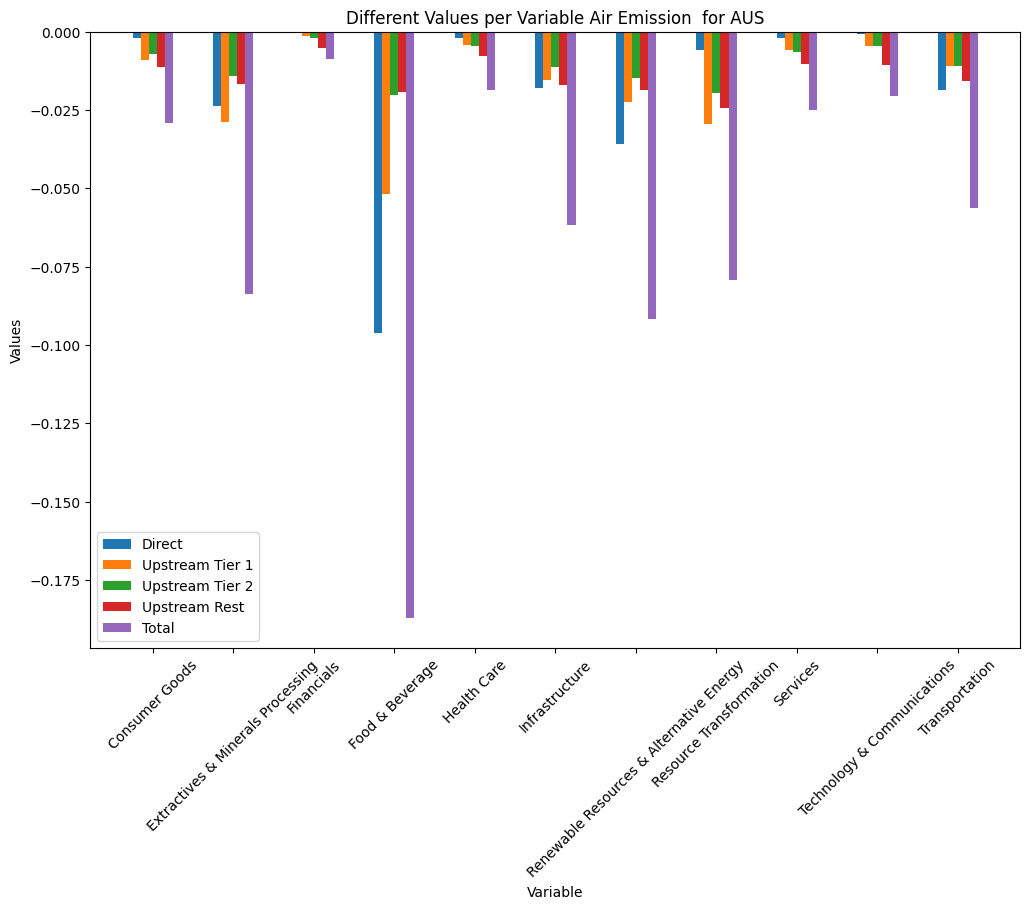

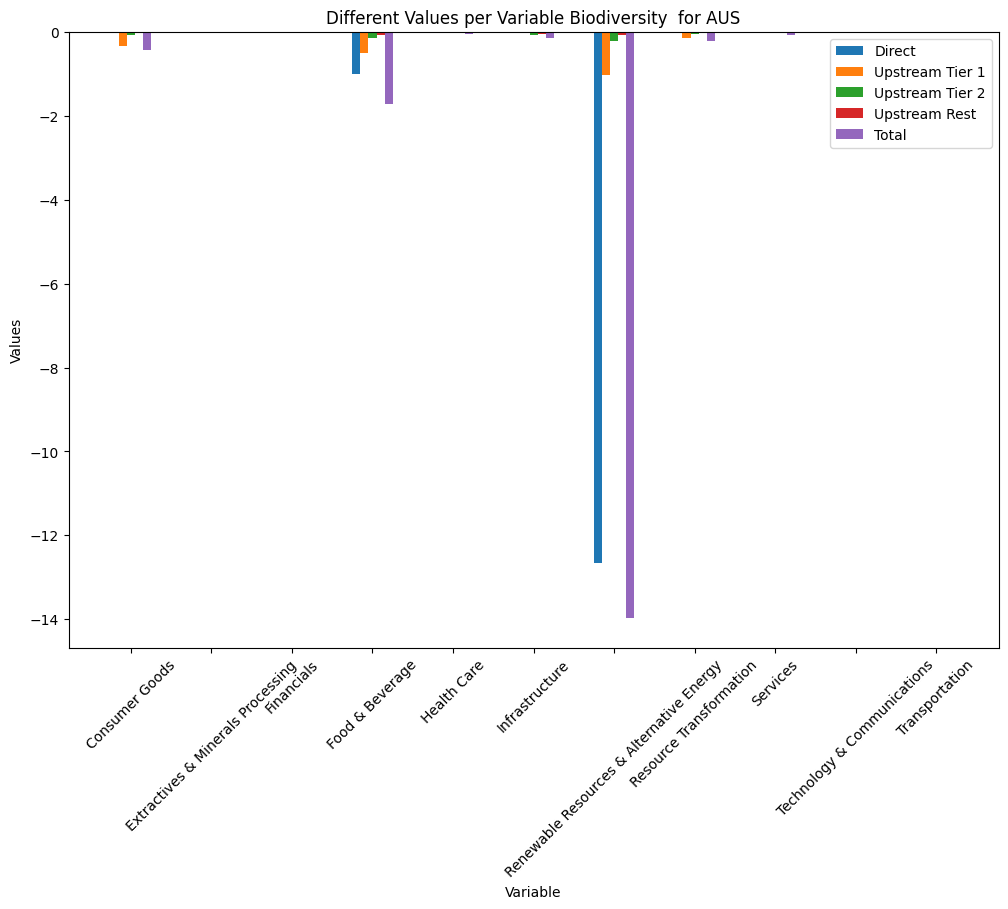

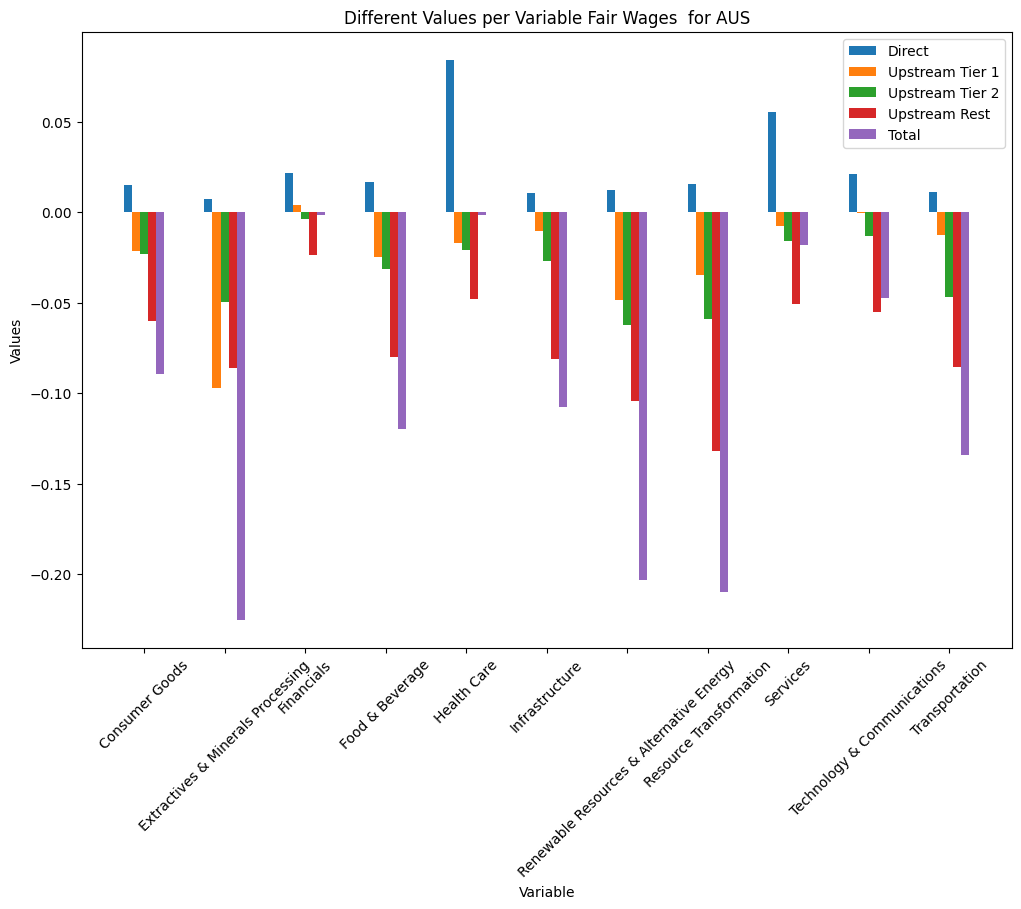

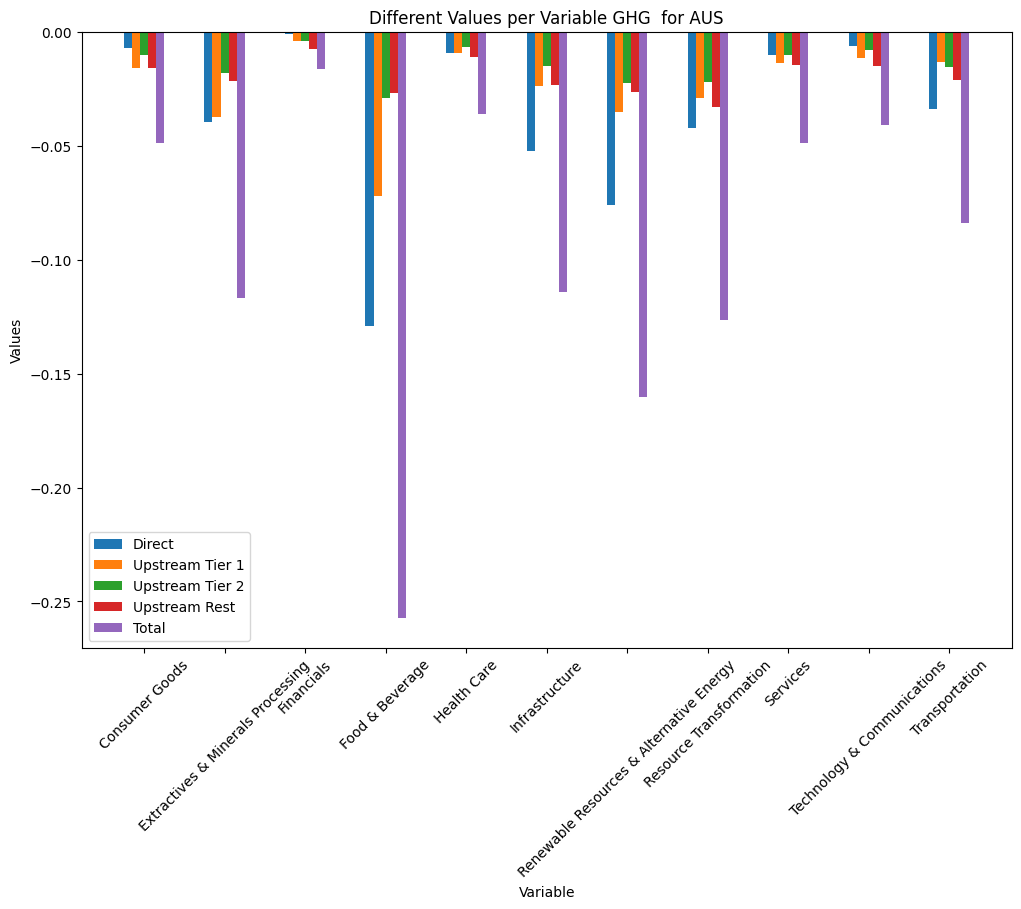

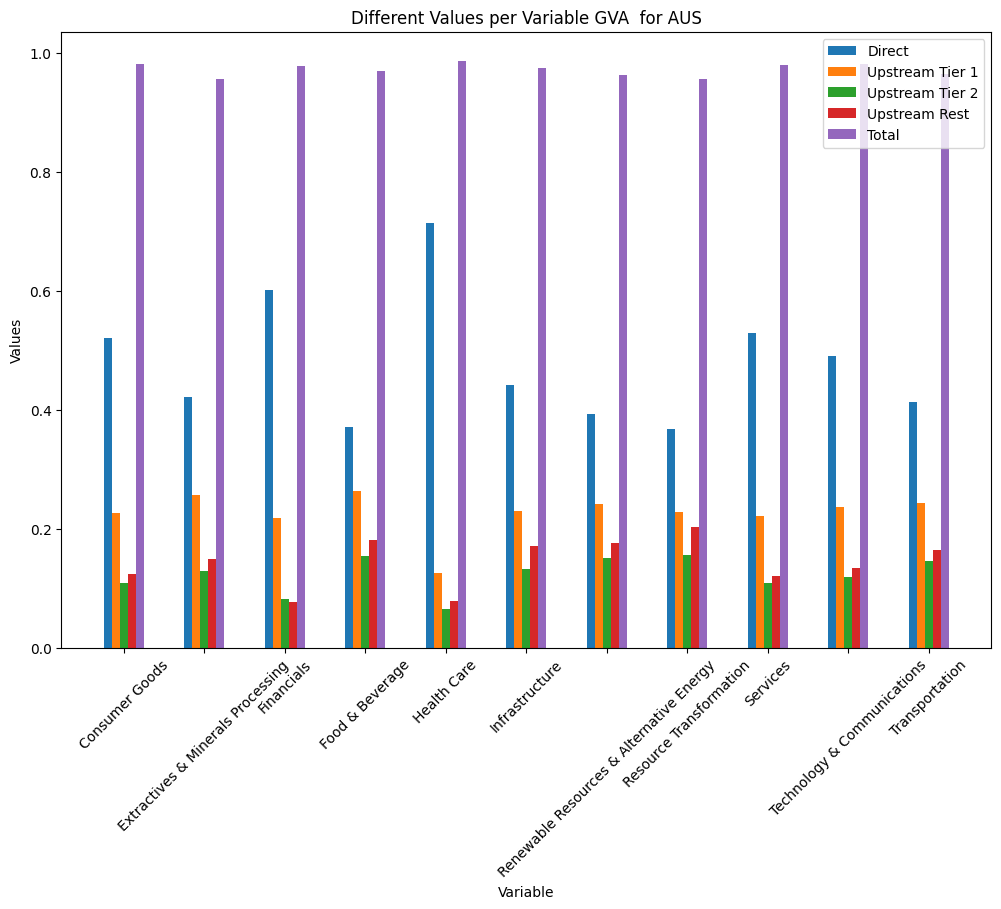

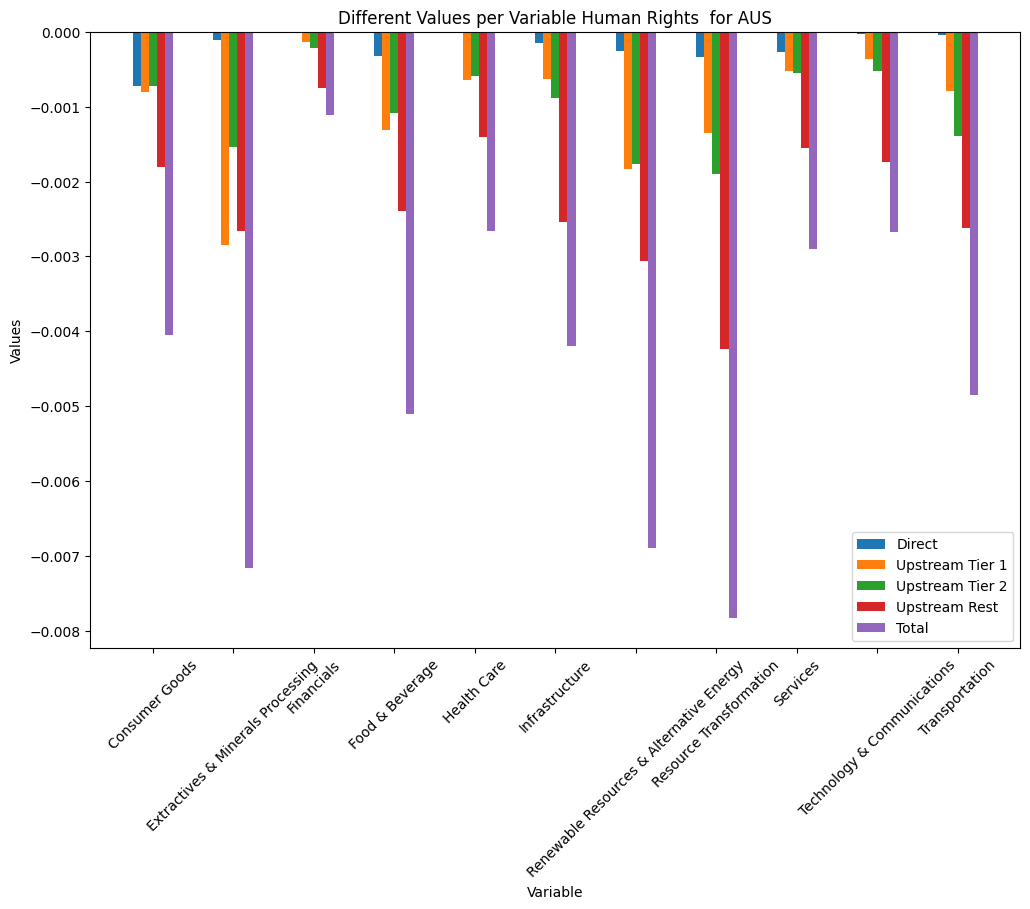

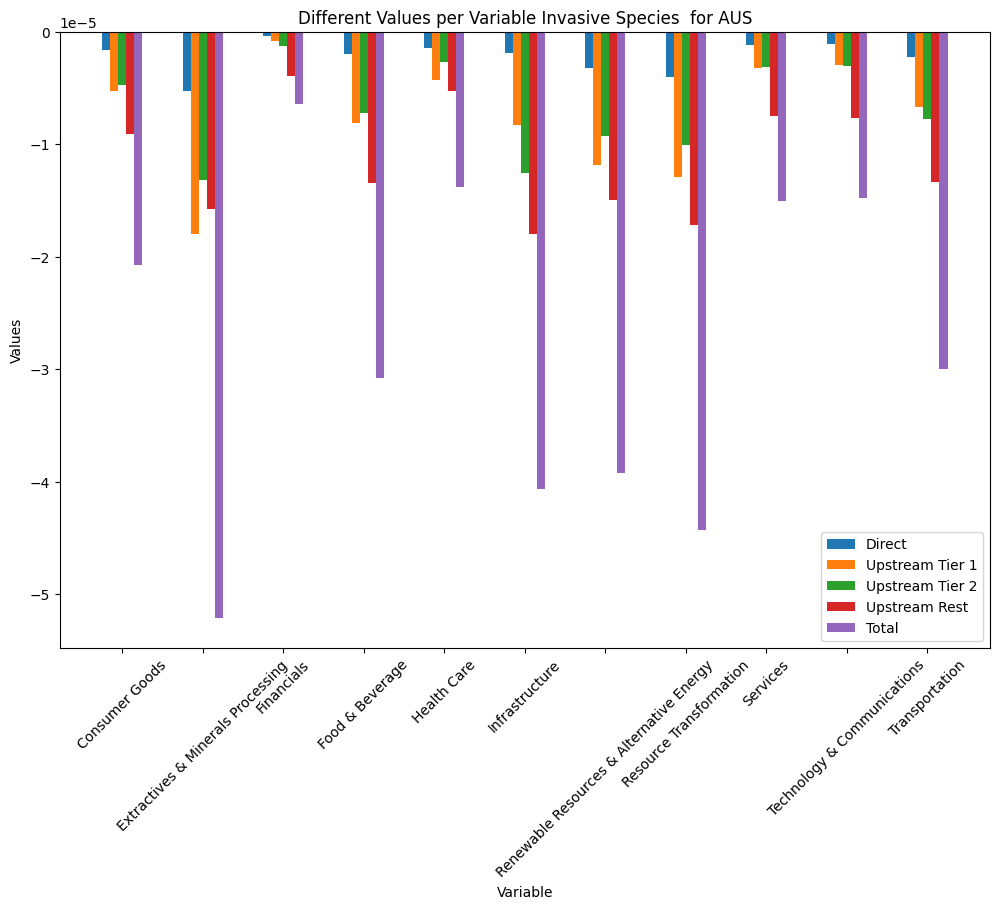

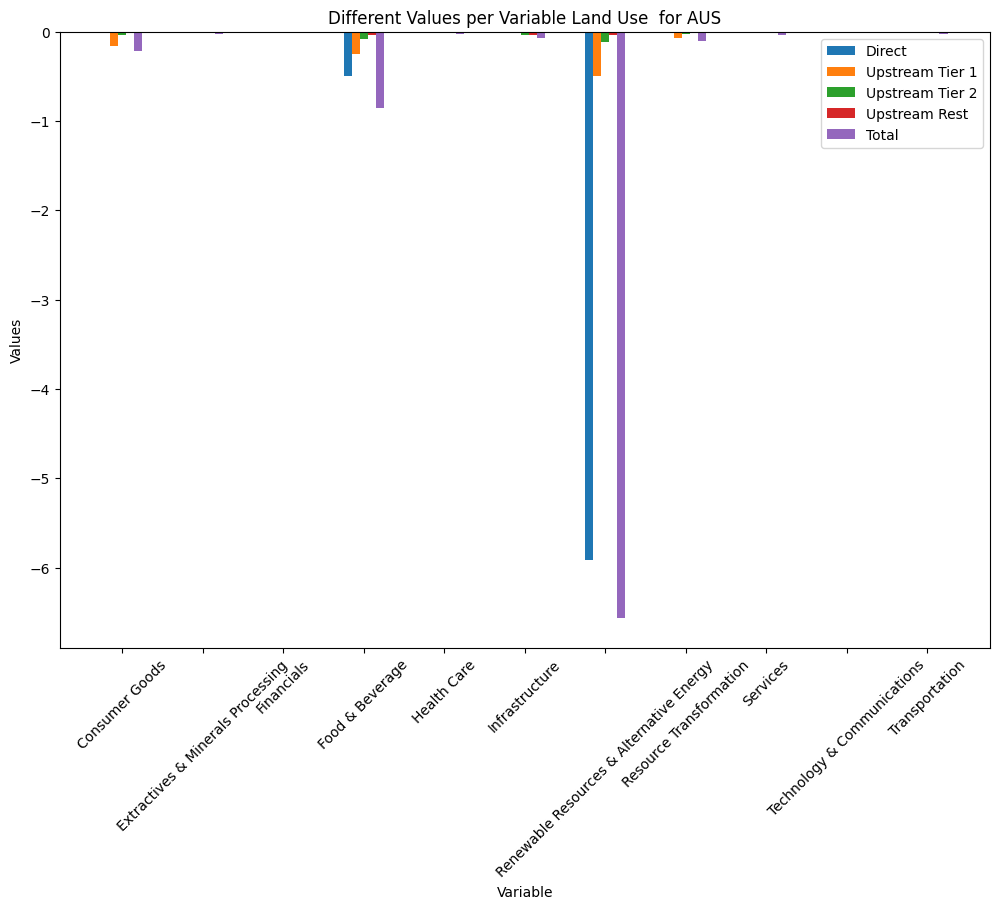

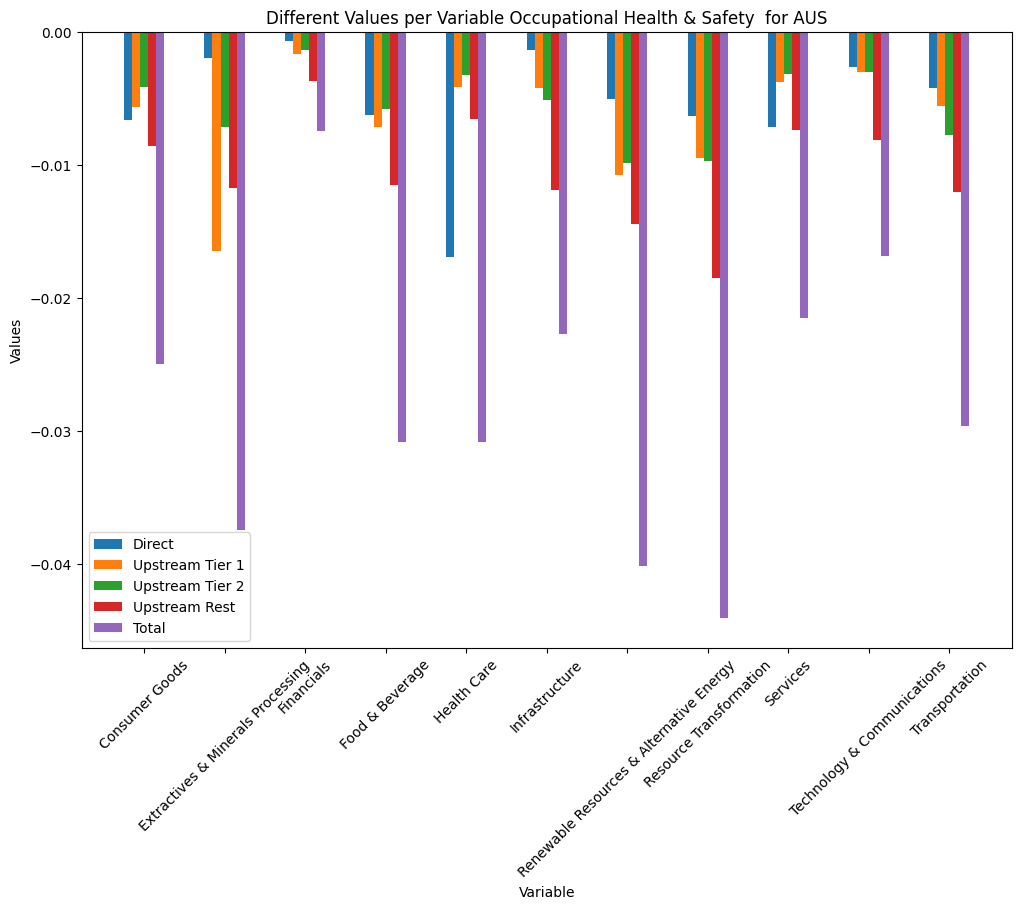

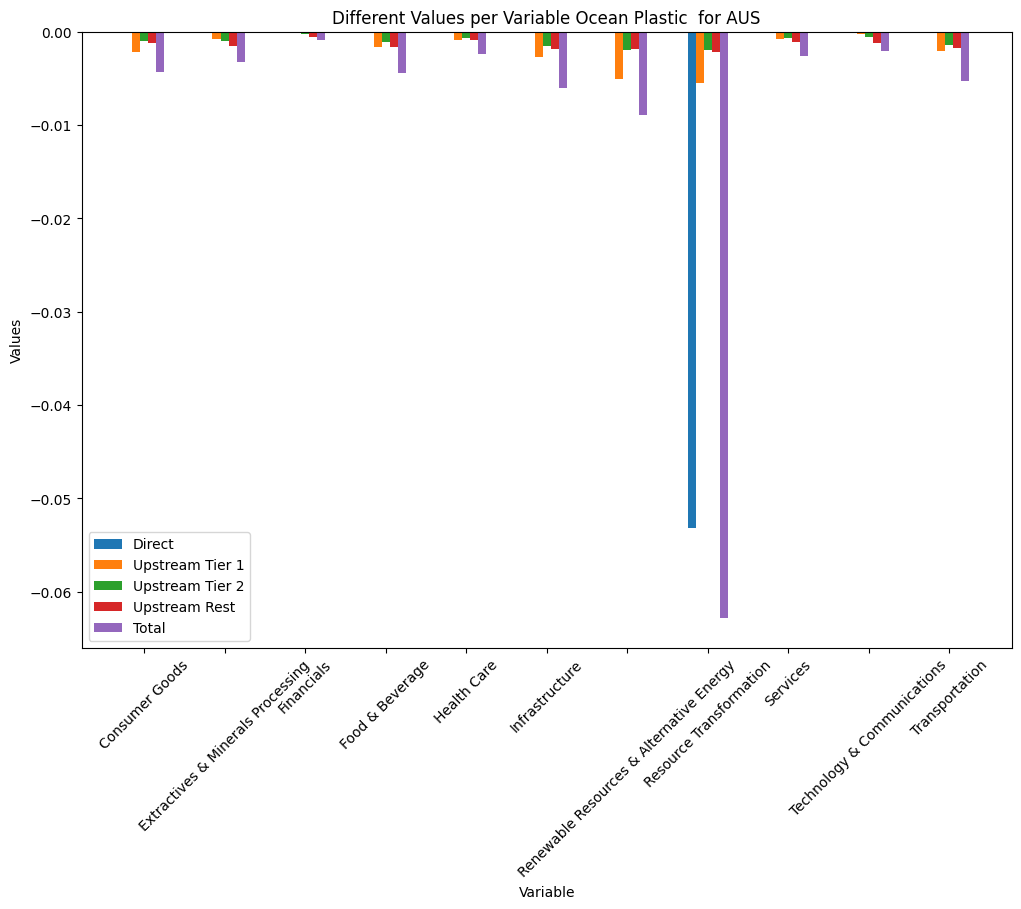

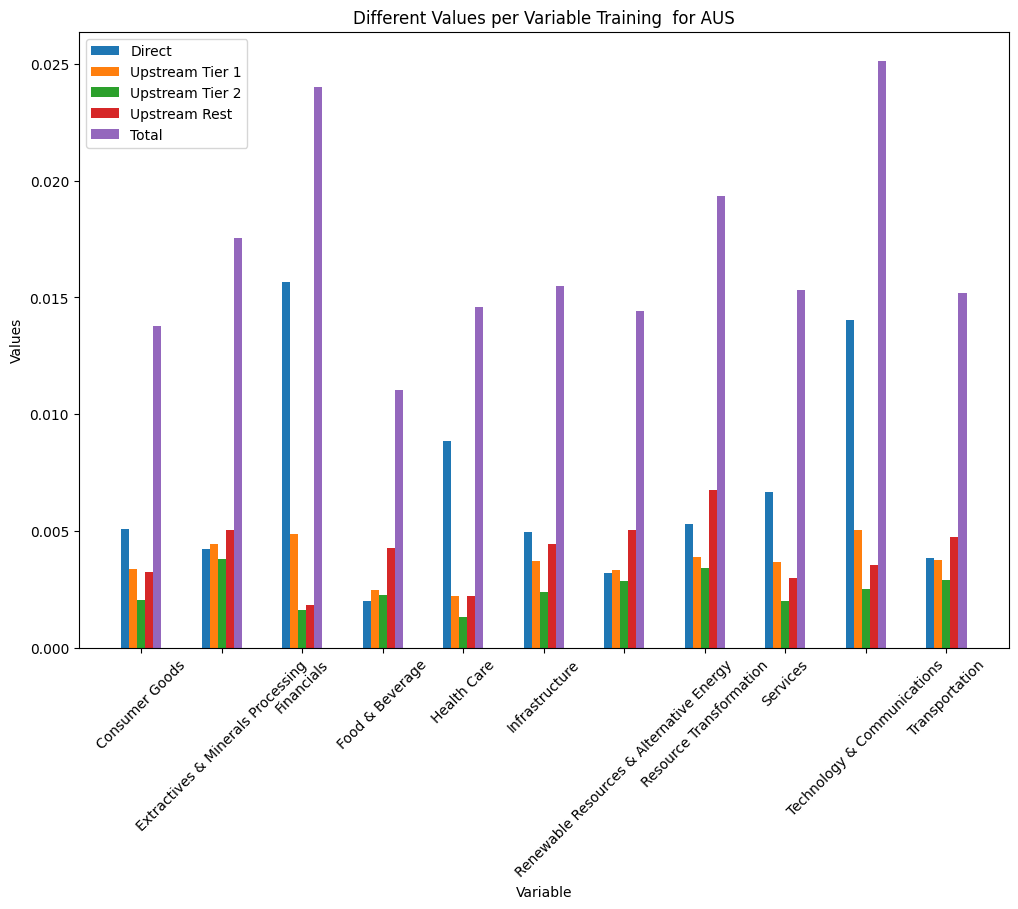

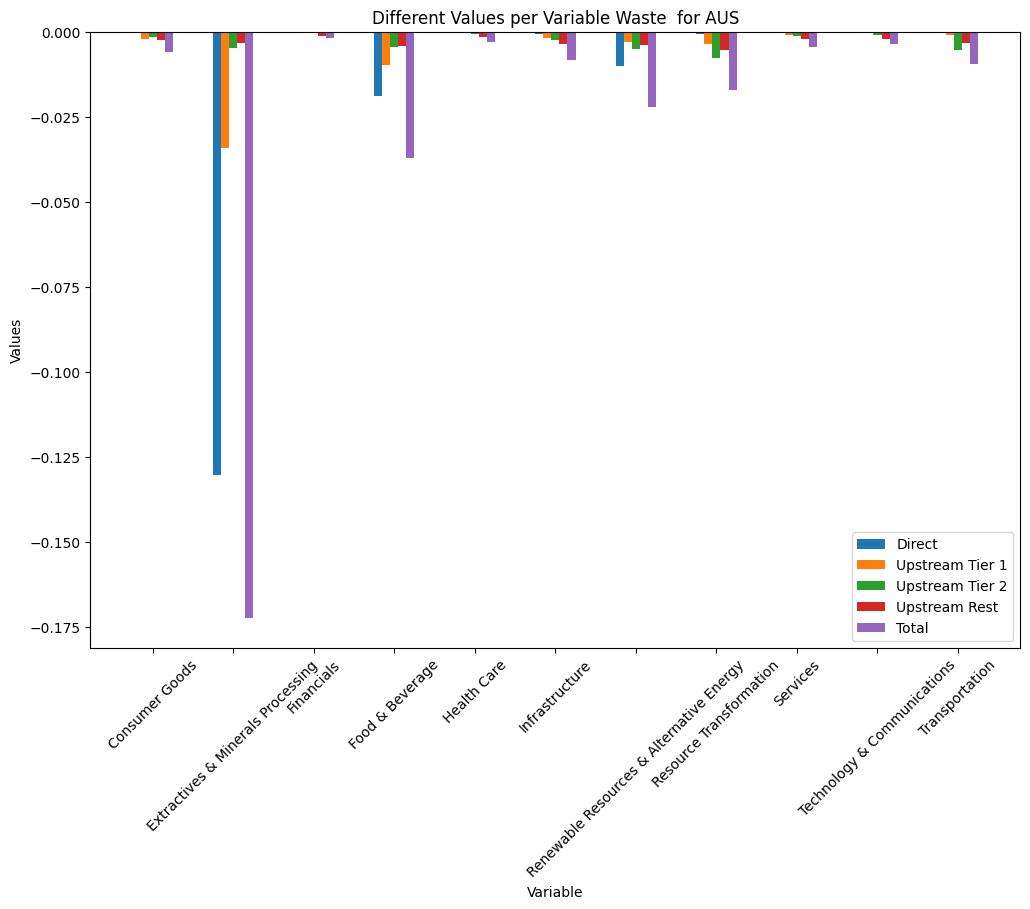

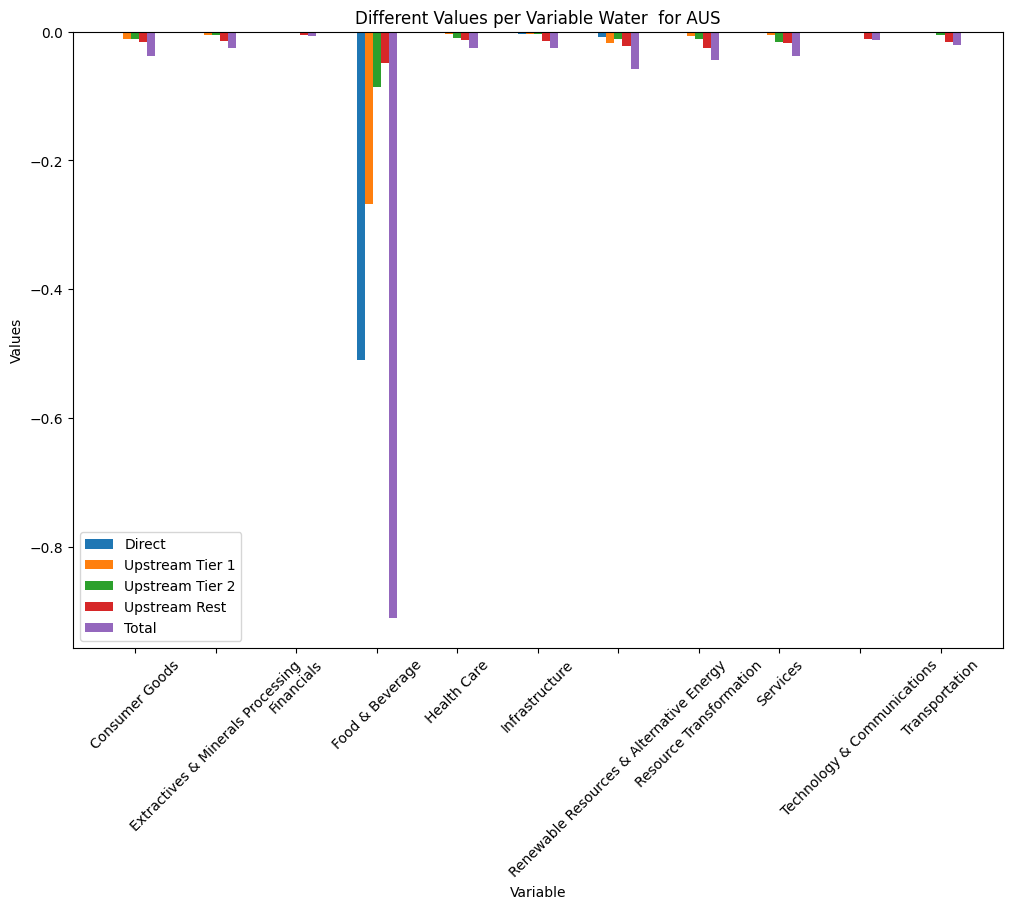

In [31]:
country = country_selector.value

for variable in df['Variable'].unique():

    filtered_data = df[(df['Variable'] == variable) & (df['Manufacturing Country'] == country)]

    variables = filtered_data['Variable']
    direct_values = filtered_data['direct']
    upstream_tier1_values = filtered_data['upstream tier 1']
    upstream_tier2_values = filtered_data['upstream tier 2']
    upstream_rest_values = filtered_data['upstream rest']
    total_values = filtered_data['Total']

    industries = filtered_data['SASB industry']

    x = range(len(variables))

    plt.figure(figsize=(12, 8))
    plt.bar(x, direct_values, width=0.1, label='Direct', align='center')
    plt.bar([p + 0.1 for p in x], upstream_tier1_values, width=0.1, label='Upstream Tier 1', align='center')
    plt.bar([p + 0.2 for p in x], upstream_tier2_values, width=0.1, label='Upstream Tier 2', align='center')
    plt.bar([p + 0.3 for p in x], upstream_rest_values, width=0.1, label='Upstream Rest', align='center')
    plt.bar([p + 0.4 for p in x], total_values, width=0.1, label='Total', align='center')

    plt.xlabel('Variable')
    plt.ylabel('Values')
    plt.title(f"Different Values per Variable {variable}  for {country}")
    plt.xticks([p + 0.2 for p in x], industries, rotation=45)
    plt.legend()
    plt.show()